# Objective
* Review camera locations in Calgary and find correlation to accident counts

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

import Grid_Analysis as ga
import Accidents as acc

# Import Traffic Signals Dataset

In [2]:
signals=pd.read_csv("Data/Traffic_Signals.csv")
signals

INSTDATE                FIRSTROAD                         SECONDROAD  \
0     1969/04/01          KENSINGTON ROAD                          12 STREET   
1     2005/02/09  COUNTRY HILLS BOULEVARD           COVENTRY HILLS BOULEVARD   
2     2000/11/13               McCALL WAY                       PEGASUS ROAD   
3     1973/01/01                72 AVENUE                      CENTRE STREET   
4     1957/01/01                 9 AVENUE                15 STREET/17 AVENUE   
...          ...                      ...                                ...   
1533  2017/08/03  COUNTRY HILLS BOULEVARD  ROCKY RIDGE RECREATIONAL FACILITY   
1534  2017/04/12          BRIDLERIDGE WAY                    BRIDLEWOOD ROAD   
1535  1966/08/01                10 STREET                          23 AVENUE   
1536  1956/01/01                 5 AVENUE                           1 STREET   
1537  2017/08/11     SUN VALLEY BOULEVARD                       SUNPARK GATE   

     QUADRANT                       INT_TYPE PEDBUTTONS PED_TIMER  \
0          NW               Overhead Flasher        Yes        No   
1          NE  Traffic signal T intersection        Yes        No   
2          NE                 Traffic signal        Yes        No   
3           N                 Traffic signal        Yes        No   
4          SE                 Traffic signal        Yes        No   
...       ...                            ...        ...       ...   
1533       NW  Traffic signal T intersection        Yes        No   
1534       SW                Pedestrian RRFB        Yes        No   
1535       NW               Overhead Flasher        Yes        No   
1536       SE                 Traffic signal         No       Yes   
1537       SE                 Traffic signal        Yes       Yes   

      ACCESSIBLE PEDESTRIAN SIGNAL   latitude   longitude  \
0                              NaN  51.052514 -114.091740   
1                              NaN  51.154211 -114.052475   
2                              NaN  51.094081 -114.011478   
3                              NaN  51.117992 -114.069588   
4                              NaN  51.037739 -114.025122   
...                            ...        ...         ...   
1533                           NaN  51.154147 -114.228956   
1534                           NaN  50.902069 -114.109199   
1535                           NaN  51.073213 -114.084589   
1536                           NaN  51.048341 -114.060387   
1537                           NaN  50.906049 -114.058065   

                                          Point  Count  
0     POINT (-114.091739730382 51.052513524679)      1  
1      POINT (-114.05247454616 51.154210611434)      1  
2     POINT (-114.011477743314 51.094081325343)      1  
3      POINT (-114.069587594341 51.11799160169)      1  
4     POINT (-114.025122275833 51.037738985756)      1  
...                                         ...    ...  
1533   POINT (-114.228956047964 51.15414689593)      1  
1534  POINT (-114.109199438382 50.902068514229)      1  
1535  POINT (-114.084588882838 51.073213223999)      1  
1536  POINT (-114.060387455583 51.048340950291)      1  
1537   POINT (-114.058064969258 50.90604877345)      1  

[1538 rows x 12 columns]

# Analyze

In [3]:
signals['INT_TYPE'].value_counts()

Traffic signal                   881
Overhead Flasher                 251
Traffic signal T intersection    213
Pedestrian RRFB                  159
1/2 signal                        17
1/4 signal                        10
Fire signal                        7
Name: INT_TYPE, dtype: int64

## Signals Distribution

In [4]:
base_coordinates = [51.044270, -114.062019]
map = folium.Map(location=base_coordinates)

signal_cluster = MarkerCluster().add_to(map)

for idx, row in signals.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                 popup='signal').add_to(signal_cluster)

map

## Accidents Distrbution

In [5]:
accident_counts = acc.get_accident_counts_by_location()

base_coordinates = [51.044270, -114.062019]
map = folium.Map(location=base_coordinates)

accident_cluster = MarkerCluster().add_to(map)

for idx, row in accident_counts.iterrows():
    loc = idx.strip('()').split(',')
    loc = [float(i) for i in loc]
    folium.Marker(loc, popup='accident').add_to(accident_cluster)

map

## Grid Analysis

In [6]:
signals_grid = ga.populate_grid(signals)
signals_grid

array([[  0.,   0.,   0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.],
       [  0.,   7.,  10.,  22.,  24.,  33.,  15.,  14.,   3.,   0.],
       [  0.,  10.,  39.,  32.,   7.,  33.,   6.,  17.,  22.,   0.],
       [  0.,   0.,  17.,  46.,  49.,  53.,  36.,  50.,  19.,   0.],
       [  0.,   0.,  22.,  35.,  77., 223.,  38.,  56.,  23.,   1.],
       [  0.,   0.,   2.,  21.,  28.,  61.,  19.,  17.,   4.,   0.],
       [  0.,   0.,   0.,   1.,  26.,  70.,  34.,  18.,   1.,   0.],
       [  0.,   0.,   0.,   0.,  13.,  34.,  18.,  27.,   6.,   0.],
       [  0.,   0.,   0.,   0.,  16.,  33.,   6.,  17.,  10.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   1.,   5.,   7.,   0.,   0.]])

In [7]:
print('{:.0f} traffic signals falls outside Calgary boundaries'.format(signals.shape[0]-signals_grid.sum()))

0 traffic signals falls outside Calgary boundaries


In [5]:
ga.display_grid_on_map(signals_grid[::-1].ravel(), 'signals count')

## Scatter Plot

Text(0, 0.5, 'Longitude')

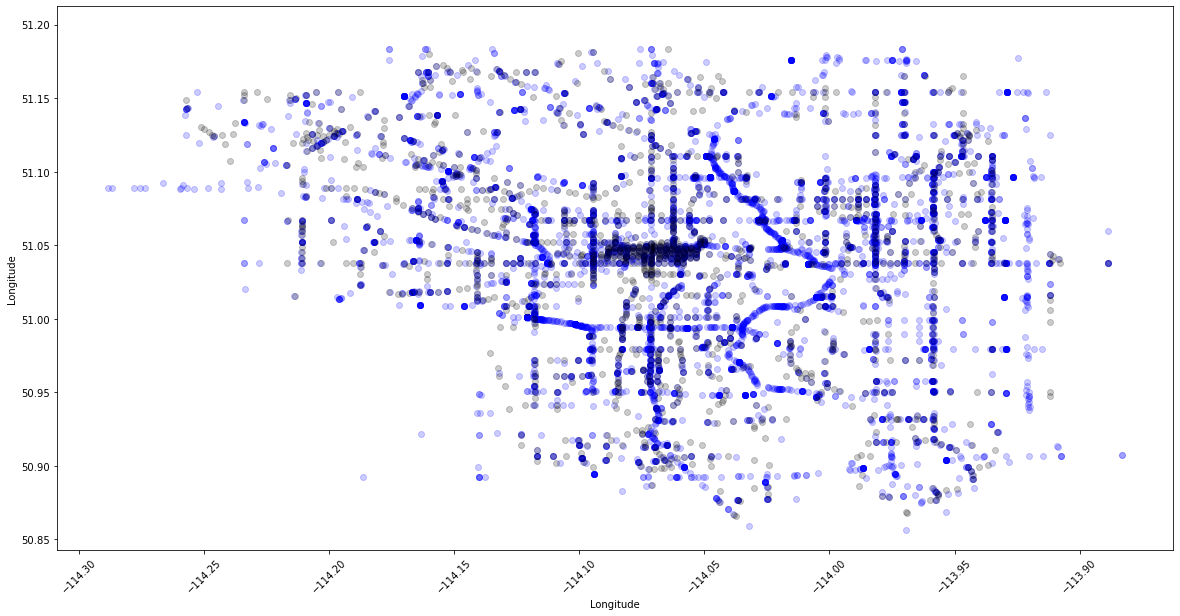

In [9]:
accidents = acc.extract_accidents('Data/Traffic_Incidents.csv', '2018')

plt.figure(figsize=(20,10))
plt.scatter(x = 'longitude', y = 'latitude', data = accidents, label = 'Accidents', c='b', alpha=0.2)
plt.scatter(x = 'longitude', y = 'latitude', data=signals, label = 'Signals', c='k', alpha=0.2)
plt.ylim(50.842822, 51.212425)
plt.xticks(rotation=45)
plt.xlabel('Longitude')
plt.ylabel('Longitude')

# Conclusions
There is no clear correlation between traffic signals and the number of accidents. However, as shown by the scatter plot, there are more traffic signals near accidents clusters, to try and regulate traffic flow.